## SKUNK Game Simulation

----

Artash N.
TOPS 2024

----

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt 
import random
import seaborn as sns
sns.set()

In [2]:
DECISION_POSSIBILITIES = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # At what stage to quit the game in each column
NUM_ITERATIONS = 100000 # Number of games we want to simulate for each above possibility (1, 2, 3, 4, 5, 6, 7 or 8)


# Function to role 2 die
def role_die():
    dice1 = random.randint(1,6)
    dice2 = random.randint(1,6)
    
    return dice1, dice2
    
# Function that plays a single game assuming the player plans to quit after "DECISION" (1 to 8) rounds
def play_game(DECISION):
    
    score_tracking = [] # Keeping track of the score
    
    for i in range(DECISION): # Play as many rounds until reaching either the planned number or till failure
        
        while True:
            d1, d2 = role_die() 
            if (i==0) and ((d1==1) or (d2==1)):
                continue
            else:
                break
        
        # If either die shows 1, reset list and return a 0 score
        if (d1==1) or (d2 ==1):
            score_tracking = []
            break
            
        # Else append the product of the die to a list
        else:
            score_tracking.append(d1*d2)
            
    score = sum(score_tracking) # Sum the individual points to determine total score
    
    return score

# List containing indv. score vals for each possibility (non-cumm.)
AVG_SCORE_IDENTIFIERS = [[], [], [], [], [], [], [], [], [], []] 
    
for DECISION in DECISION_POSSIBILITIES: # For every possible decision (1 - 8)
    
    for i in range(NUM_ITERATIONS):  # Repeat experiment for each decision predefined number of iterations
        
        # Play the game 5 times for each decision (S K U N K)
        
        total_score = sum([play_game(DECISION), 
                           play_game(DECISION), 
                           play_game(DECISION), 
                           play_game(DECISION),
                           play_game(DECISION)])
        
        # Append the total score over 5 columns to the individual score list for the decision number
        
        AVG_SCORE_IDENTIFIERS[DECISION-1].append(total_score)
                          
                          

----

In [3]:
# Average score obtained from each decision
MEAN_SCORES = [sum(x)/len(x) for x in AVG_SCORE_IDENTIFIERS]

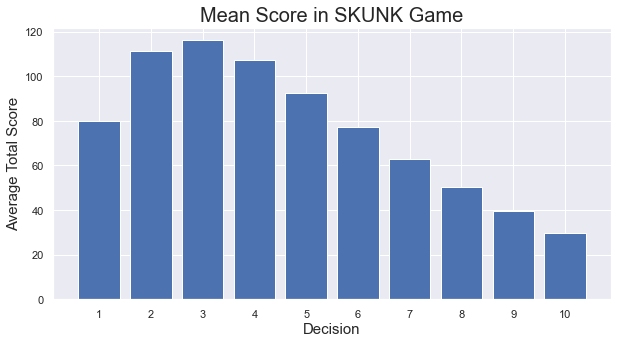

In [4]:
# Plot Mean Scores for each Decision

plt.figure(figsize = (10, 5))
plt.title("Mean Score in SKUNK Game", size=20)
plt.bar(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], MEAN_SCORES)
plt.xlabel("Decision", size=15)
plt.ylabel("Average Total Score", size = 15)
plt.show()

---

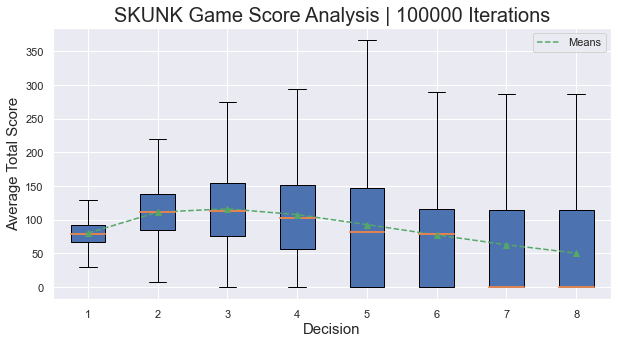

In [5]:
# Create a boxplot for each decision for more in-depth analysis

plt.figure(figsize = (10, 5))
plt.title("SKUNK Game Score Analysis | {} Iterations".format(NUM_ITERATIONS), size=20)

plt.xlabel("Decision", size=15)
plt.ylabel("Average Total Score", size = 15)

plt.boxplot(AVG_SCORE_IDENTIFIERS[:8], showfliers=False, patch_artist=True, showmeans=True, medianprops={"linewidth": 2})
plt.plot(range(1,9), MEAN_SCORES[:8], color = 'g', linestyle='--', label='Means')

plt.legend()
plt.show()